### Auto\_ViML

Auto_ViML works on any Multi-Class, Multi-Label Data Set. So you can have many target labels. You don't have to tell Auto_ViML whether it is a Regression or Classification problem.

Parameters:
- **hyper_param:** Tuning options are GridSearch ('GS') and RandomizedSearch ('RS'). Default is 'RS'.
- **feature_reduction:** Default = 'True' but it can be set to False if you don't want automatic feature_reduction since in Image data sets like digits and MNIST, you get better results when you don't reduce features automatically. You can always try both and see.
- **KMeans_Featurizer**
    - `True:` Adds a cluster label to features based on KMeans. Use for Linear.
    - `False:` (default) For Random Forests or XGB models, leave it False since it may overfit.
- **Boosting_Flag:** you have 4 possible choices (default is False):
    - `None:` This will build a Linear Model
    - `False:` This will build a Random Forest or Extra Trees model (also known as Bagging)
    - `True:` This will build an XGBoost model
    - `CatBoost:` This will build a CatBoost model (provided you have CatBoost installed)
- **Add_Poly:** Default is 0 which means do-nothing. But it has three interesting settings:\
    - `1:` Add interaction variables only such as x1x2, x2x3,...x9*10 etc.\
    - `2:` Add Interactions and Squared variables such as x12, x22, etc.\
    - `3:` Adds both Interactions and Squared variables such as x1x2, x1\*\*2,x2x3, x2\*\*2, etc.
- **Stacking_Flag:** Default is False. If set to True, it will add an additional feature which is derived from predictions of another model. This is used in some cases but may result in overfitting. So be careful turning this flag "on".
- **Binning_Flag:** Default is False. It set to True, it will convert the top numeric variables into binned variables through a technique known as "Entropy" binning. This is very helpful for certain datasets (especially hard to build models).
- **Imbalanced_Flag:** Default is False. If set to True, it will use SMOTE from Imbalanced-Learn to oversample the "Rare Class" in an imbalanced dataset and make the classes balanced (50-50 for example in a binary classification). This also works for Regression problems where you have highly skewed distributions in the target variable. Auto_ViML creates additional samples using SMOTE for Highly Imbalanced data.
- **verbose:** This has 3 possible states:\
    - `0:` limited output. Great for running this silently and getting fast results.\
    - `1:` more charts. Great for knowing how results were and making changes to flags in input.\
    - `2:` lots of charts and output. Great for reproducing what Auto_ViML does on your own.

Imported Auto_ViML version: 0.1.710. Call using:
             m, feats, trainm, testm = Auto_ViML(train, target, test,
                            sample_submission='',
                            scoring_parameter='', KMeans_Featurizer=False,
                            hyper_param='RS',feature_reduction=True,
                             Boosting_Flag='CatBoost', Binning_Flag=False,
                            Add_Poly=0, Stacking_Flag=False,Imbalanced_Flag=False,
                            verbose=1)
            

Imported Auto_NLP version: 0.1.01.. Call using:
     train_nlp, test_nlp, nlp_pipeline, predictions = Auto_NLP(
                nlp_column, train, test, target, score_type='balanced_accuracy',
                modeltype='Classification',top_num_features=200, verbose=0,
                build_model=True)


==================== System Information ====================
System: Windows
Node Name: Michele-PC
Release: 10
Version: 10.0.19044
Machine: AMD64
Processor: AMD64 Family 23 Model 96 Stepping 1, AuthenticAMD
====================== CPU Information ======================
Physical cores: 8
Total cores: 8
==================== Memory Information ====================
Total: 15.36GB
Available: 7.50GB
Used: 7.87GB
================== System Information End ==================
##############  D A T A   S E T  A N A L Y S I S  #######################
ALERT! Changing hyperparameter search to RS. Otherwise, Random Forests will take too long for 10,000+ rows
Training Set Shape = (103904, 25)
    Training Set Memory Usage = 19.82 MB
Test Set Shape = (25976, 25)
    Test Set Memory Usage = 4.95 MB
Single_Label Target: ['satisfaction']
Random shuffling the data set before training
    Using RandomizedSearchCV for Hyper Parameter Tuning. This is 3X faster than GridSearchCV...
       Class  -> Counts -> Pe

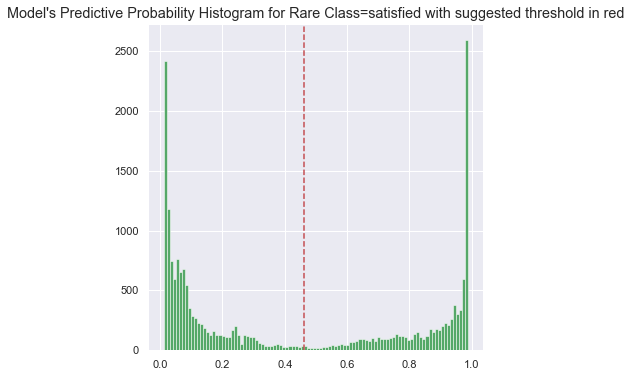

    Using threshold=0.5. However, 0.463 provides better F1=0.93 for rare class...
########################################################
Forests Model Prediction Results on Held Out CV Data Set:
    OOB Score = 0.935
    Regular Accuracy Score = 93.6%
Balanced Accuracy = 93.34% with Threshold = 0.50
Confusion Matrix:
[[11181   595]
 [  745  8260]]
              precision    recall  f1-score   support

           0       0.94      0.95      0.94     11776
           1       0.93      0.92      0.92      9005

    accuracy                           0.94     20781
   macro avg       0.94      0.93      0.93     20781
weighted avg       0.94      0.94      0.94     20781

Balanced Accuracy = 93.42% with Threshold = 0.46
Confusion Matrix:
[[11144   632]
 [  701  8304]]
              precision    recall  f1-score   support

           0       0.94      0.95      0.94     11776
           1       0.93      0.92      0.93      9005

    accuracy                           0.94     20781
   ma

After multiple models, Ensemble Model Results:
Binary Class Model Metrics Report
#####################################################
    Accuracy          = 90.7%
    Balanced Accuracy = 90.0%
    Precision         = 93.4%
    Average Precision = 91.2%
    Recall            = 84.5%
    F1 Score          = 88.7%
#####################################################
              precision    recall  f1-score   support

           0       0.89      0.95      0.92     11776
           1       0.93      0.84      0.89      9005

    accuracy                           0.91     20781
   macro avg       0.91      0.90      0.90     20781
weighted avg       0.91      0.91      0.91     20781

[[11238   538]
 [ 1396  7609]]
#############################################################################
Single Model is better than Ensembling Models for this data set.
Could not plot Cross Validation Parameters
    Time taken for this Target (in seconds) = 1360
    Binning_Flag set to False or the

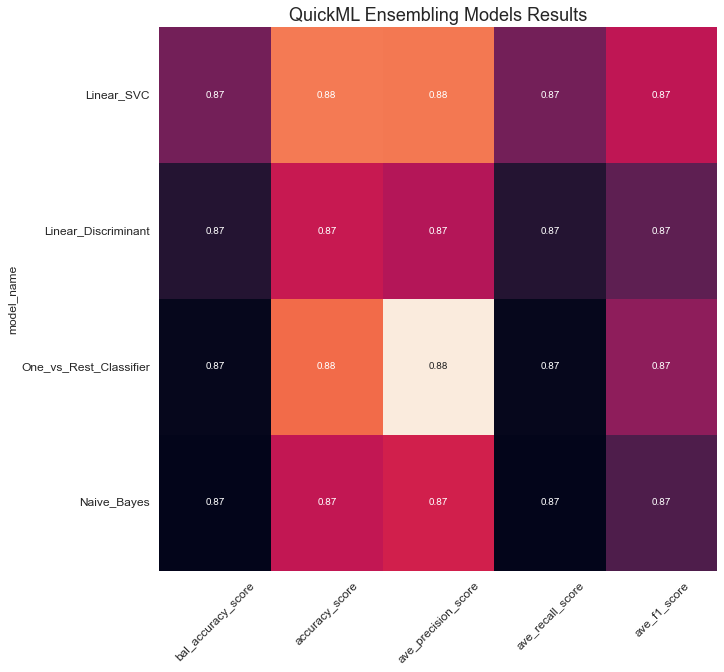

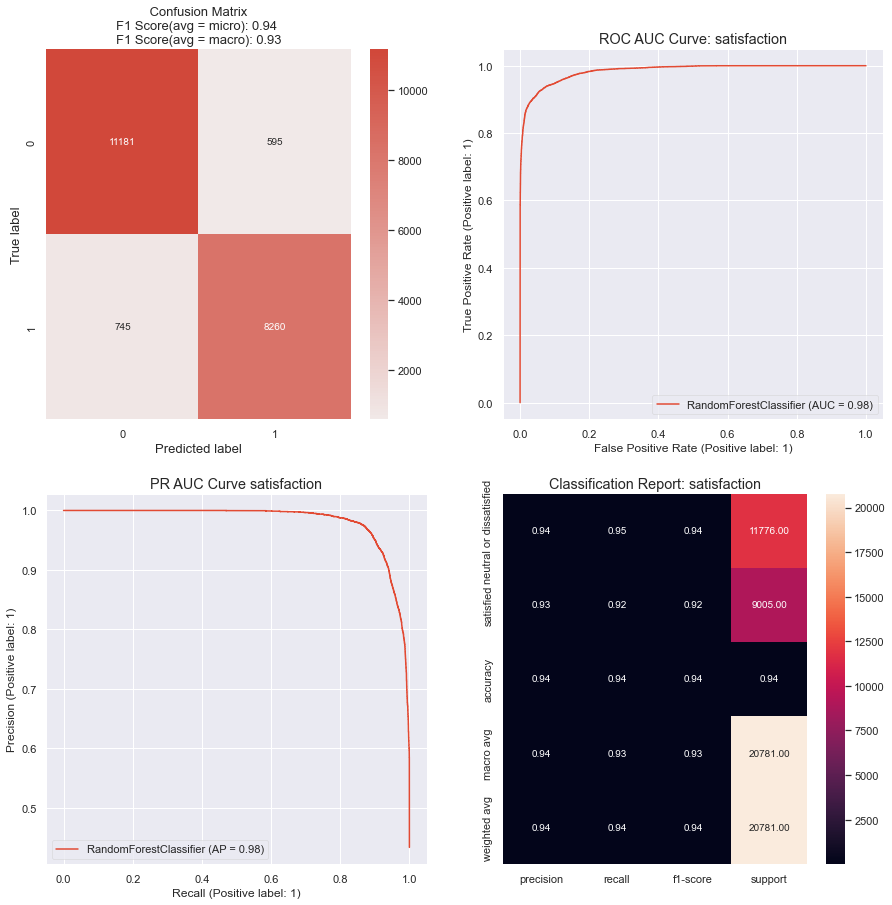

<Figure size 1080x900 with 0 Axes>

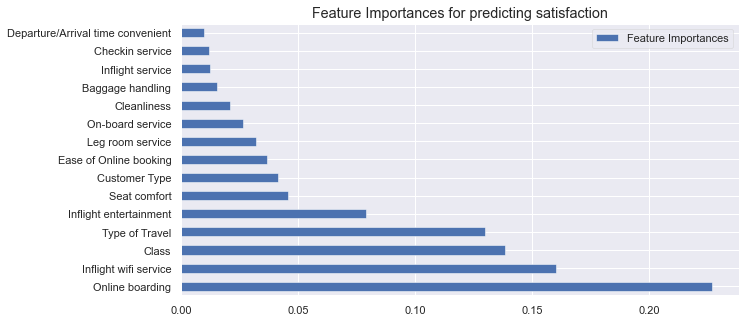

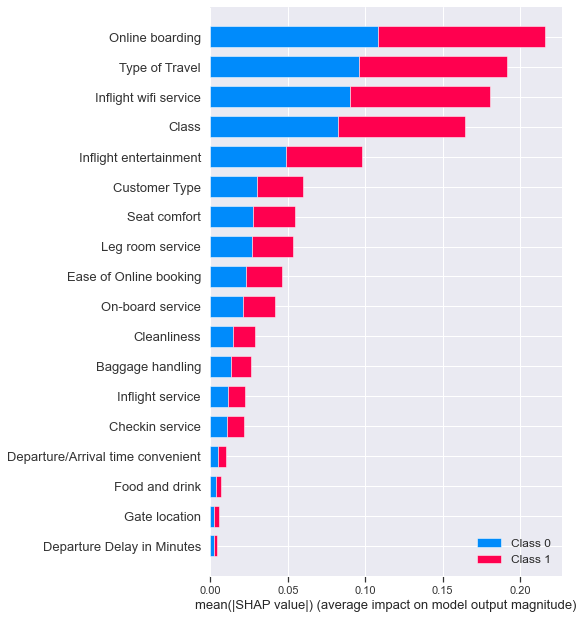

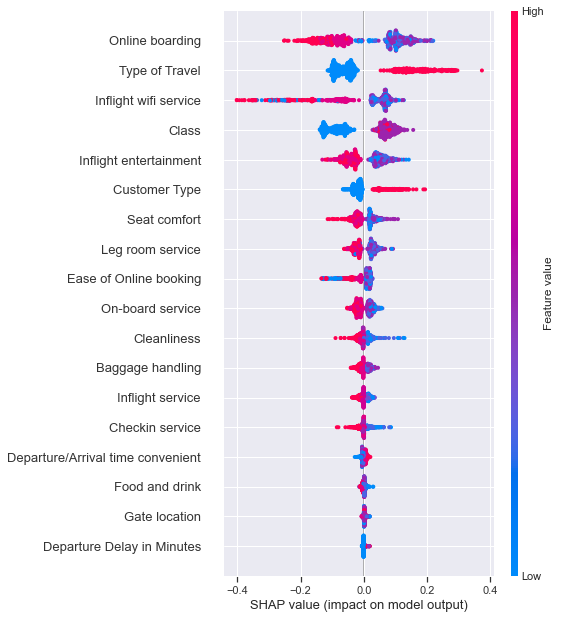

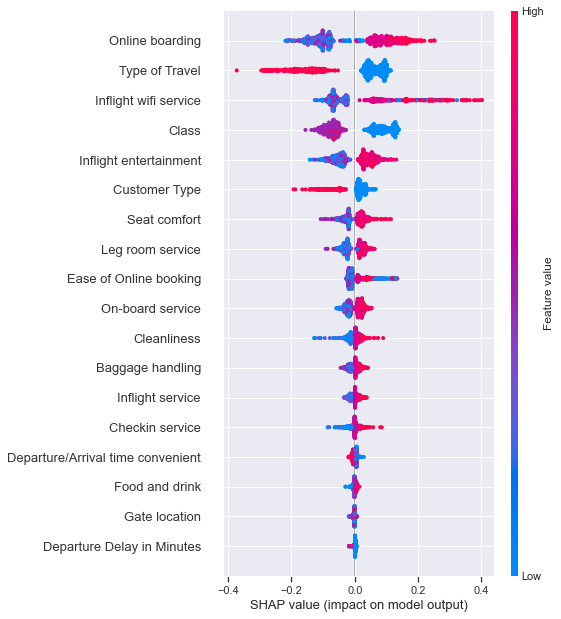

############### P R E D I C T I O N  O N  T E S T   C O M P L E T E D  #################
    Time taken thus far (in seconds) = 1382
Writing Output files to disk...
    Saving predictions to .\satisfaction\satisfaction_Binary_Classification_test_modified.csv
    Saving predictions to .\satisfaction\satisfaction_Binary_Classification_submission.csv
    Saving predictions to .\satisfaction\satisfaction_Binary_Classification_train_modified.csv
###############  C O M P L E T E D  ################
Time Taken in mins = 23.1 for the Entire Process


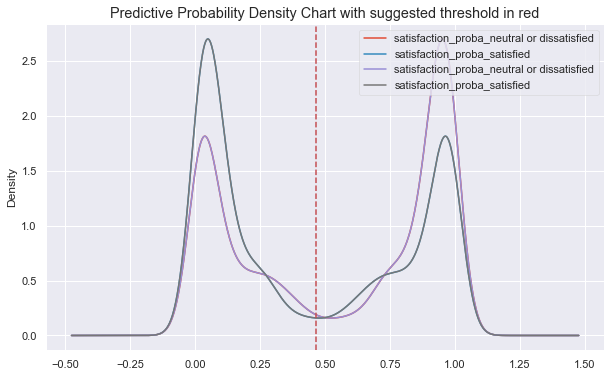

In [1]:
import pandas as pd
from autoviml.Auto_ViML import Auto_ViML
train = pd.read_csv("../../datasets/classification/train.csv")
test = pd.read_csv("../../datasets/classification/test.csv")

model, features, trainm, testm = Auto_ViML(
    train,
    "satisfaction",
    test,
    hyper_param="GS",
    feature_reduction=True,
    scoring_parameter="weighted-f1",
    KMeans_Featurizer=False,
    Boosting_Flag=False,
    Binning_Flag=False,
    Add_Poly=False,
    Stacking_Flag=False,
    Imbalanced_Flag=False,
    verbose=2
)